# Modeling Bread Rising

## Background

### Academic Papers

Bread is a core food for most every culture around the world ([Boynton n.d.](https://teachers.yale.edu/curriculum/viewer/initiative_17.04.02_u)). Understanding how dough transforms enables bakers to create more desirable products.

Due to the sheer complexity of bread, there is not a direct model that simulates bread rising but due to millions of years making the product, both academics and laypeople have a general understanding of the processes at play ([Turbin-Orger 2012](https://www-sciencedirect-com.libproxy.berkeley.edu/science/article/pii/S0733521012001695)). As dough is made, it is either provided yeast or kneaded carefully to introduce pockets of air throughout. This makes up the base of our model.

When left to sit, the air pockets expand and the loaf increases in size ([Boynton n.d.](https://teachers.yale.edu/curriculum/viewer/initiative_17.04.02_u)). The loaf becomes rounded due to a combination of pressures and forces. The airbubbles and the dough that lines their pockets want to move outward, pushed by material from sides that are blocked by hard surfaces (such as a pan) and their own expanding. The dough wants to keep the loaf together, creating surface tension and attempting to minimize the amount it must be stretched. For these reasons, the loaf begins to have a circular shape as this shape has the least surface area for the most volume.

### Importing and Loading Necessary Packages

I referenced many homeworks and the midterm in writing this code. I also used stackoverflow where denoted.

In [1]:
#HW 7 - Heat Modeling Assignment
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
import math
import datetime #HW 10 - Seismology
from tqdm import tqdm

current_time = datetime.datetime.now()
metadata = dict(title='Bread Bubbles' + str(current_time), artist='Zoe Chyatte',comment='Final Project Animation')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)

#HW 9
%matplotlib inline

### Creating Original Functions

While I know the math behind graphing spheres, it was difficult to get them to render in the format I wanted. For help on rendering the spheres, I referenced class assignments on spheres as well as Stackoverflow articles: [Schlömer 2017](https://stackoverflow.com/questions/45324258/draw-many-spheres-efficiently), [Deshpande 2020](https://stackoverflow.com/questions/61048426/python-generating-3d-sphere-in-numpy) and [Vincent 2021](https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector). In general, I referenced prior assignments in this class as well as some more Stackoverflow articles for formatting help ([Dave 2010](https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots)).

In [9]:
scale = 1000
initial_allowable_space = np.zeros((scale, scale))

def create_line(table_matrix, start_coor_3, stop_coor_3): #all lines have a max width of 2
    size = table_matrix.shape[0]
    
    #global initial_allowable_space
    
    #calculate line b = y - mx
    
    first_x = start_coor_3[0]
    first_y = start_coor_3[1]
    second_x = stop_coor_3[0]
    second_y = stop_coor_3[1]
    
    if first_x == second_x:
        m == 0
    else:
        m = (second_y - first_y)/(second_x - first_x)
    
    b = first_y - (m*first_x)

    altered_initial_allowable_space = np.copy(table_matrix)
    min_x = int(min(second_x, first_x))
    max_x = int(max(second_x, first_x))
    min_y = int(min(second_y, first_y))
    max_y = int(max(second_y, first_y))
    for i in range(min_y, max_y):
        for j in range(min_x, max_x): #based on pixel graphic assignments
            if abs(b - (i - (m*j))) < size//15: #thickness of lines on right side of inequality, personal preference
                altered_initial_allowable_space[i, j] = 1
    return altered_initial_allowable_space

def create_basic_loaf(number_of_spheres):
    left = 0 #scale * 1/5
    right = 500 #scale #* 4/5
    
    #first
    x_val = np.random.random() * 500
    #y_val = np.random.random() * scale
    while left > x_val or x_val > right:
        x_val = np.random.random()
        #y_val = np.random.random()
        if left <= x_val <= right:
            break
    y_val = np.random.random()*1000
    z_val = np.random.random() *10
    sphere_center_array = np.array([[x_val, y_val, z_val]])
        
        
    for i in tqdm(range(number_of_spheres), desc="Creating Loaf", miniters=1):
        x_val = np.random.random() * scale
        #y_val = np.random.random() * scale
        while left > x_val or x_val > right:
            x_val = np.random.random()
            #y_val = np.random.random()
            if left <= x_val <= right:
                break
        y_val = np.random.random()*1000
        z_val = np.random.random() *10
        new_coor = np.array([[x_val, y_val, z_val]])
        sphere_center_array = np.concatenate((sphere_center_array, new_coor), axis=0)

    return sphere_center_array

def create_random_bread_formation(number_of_lines, table_matrix=initial_allowable_space):
    bread_table_matrix = np.copy(table_matrix)
    size = bread_table_matrix.shape[0]
    for i in range(number_of_lines):
        pt1 = np.random.rand(3)*size
        pt2 = np.random.rand(3)*size
        bread_table_matrix = create_line(bread_table_matrix, pt1, pt2)
    return bread_table_matrix

def rand_direction(val1, val2, table_matrix):
    r = np.random.random()
    fir_quart = 0.25
    sec_quart = fir_quart + 0.25
    thi_quart =  sec_quart + 0.25 #= 0.75
        
    if 0.0 <= r < fir_quart:
        val1 += 1
    elif fir_quart <= r < sec_quart:
        val1 -= 1
    elif sec_quart <= r < thi_quart:
         val2 += 1
    else:
        val2 -= 1
        
    if val1 >= table_matrix.shape[0]:
        val1 = 0
            
    elif val1 <= 0:
        val1 = table_matrix.shape[0] - 1
        
    if val2 >= table_matrix.shape[0]:
        val2 = 0
    elif val2 <= 0:
        val2 = table_matrix.shape[0] - 1
        
    return val1, val2

def find_acceptable_spots(coordinates_3, table_matrix):
    val1 = coordinates_3[1]
    val2 = coordinates_3[0]
    val1 = round(val1*1000)
    val2 = round(val2*1000)
    
    if val1 >= table_matrix.shape[0]:
        val1 = 0
    elif val1 <= 0:
        val1 = table_matrix.shape[0] - 1
        
    if val2 >= table_matrix.shape[0]:
        val2 = 0
    elif val2 <= 0:
        val2 = table_matrix.shape[0] - 1
        
    #print(val1, val2)
    
    
    if table_matrix[val1, val2] == 1:
        table_matrix[val1, val2] == 2
    else:
        while True:
            val1, val2 = rand_direction(val1, val2, table_matrix)
            if table_matrix[val1, val2] == 1:
                table_matrix[val1, val2] == 2
                return [round(val1), round(val2), coordinates_3[2]]
            else:
                continue
    return [round(val1), round(val2), coordinates_3[2]]

def array_applying_find_acceptable_spots(array, table_matrix):
    new_array = np.copy(array)
    for i in range(new_array.shape[0]):
        new_array[i] = find_acceptable_spots(new_array[i], table_matrix)
    return new_array

def create_sphere_x_y_z(center_coordinate_array, radius_val):
    x_coor = center_coordinate_array[0] #/1000
    y_coor = center_coordinate_array[1] #/1000
    z_coor = center_coordinate_array[2] * 50
    
    r = np.random.random()
    if r <= 20:
        radius_val *= 10
    else:
        radius_val *= 800
      
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = x_coor + radius_val * np.cos(u) * np.sin(v)
    y = y_coor + radius_val * np.sin(u) * np.sin(v)
    z = z_coor + radius_val * np.cos(v)
    return x, y, z

def check_sphere_1_external_to_sphere_2(center_coor_1, center_coor_2, axis_string):
    #for which axis
    if axis_string == "z" or axis_string == "Z":
        check_val = 2
    elif axis_string == "y" or axis_string == "Y":
        check_val = 1
    else:
        check_val = 0
    #is sphere 1 external
    if center_coor_1[check_val] > center_coor_2[check_val]:
        return True
    else: 
        return False
    
def check_sphere_overlapping(centers_array, radii_array):
    number_of_spheres = len(radii_array)
    
    distance_matrix = np.zeros((number_of_spheres, number_of_spheres))
    for i in range(number_of_spheres):
        coor_center_1 = centers_array[i]
        radius_1 = radii_array[i]
        for j in range(number_of_spheres):
            if i == j: #same sphere
                distance_matrix[i, j] = abs(radius_1) + .05 #may need to change value
                break
            else: #different spheres
                coor_center_2 = centers_array[j]
                radius_2 = radii_array[j]
                distance_sphere_centers = abs(math.dist(coor_center_1, coor_center_2))
                max_radius = max(radius_1, radius_2)
                if max_radius > distance_sphere_centers: #if they overlap
                    distance_matrix[i, j] = distance_sphere_centers
                    
                    #for whichever one is higher/to the outside, shift it
                    #if sphere one is higher/to the outside
                    if check_sphere_1_external_to_sphere_2(coor_center_1, coor_center_2, "Z"):
                        coor_center_1[2] += abs(distance_sphere_centers - max_radius)
                    else:
                        coor_center_2[2] += abs(distance_sphere_centers - max_radius)
                    #if sphere two is higher/to the outside
                    
                    
                else: #do not overlap
                    distance_matrix[i, j] = 0
    #return centers_array, radii_array
                
def generate_bubbles(number_of_spheres, table_matrix):
    array_sphere_centers = create_basic_loaf(number_of_spheres) #np.random.rand(number_of_spheres, 3)
    #array_sphere_centers = array_applying_find_acceptable_spots(array_sphere_centers, table_matrix)
    array_sphere_radii = np.random.rand(number_of_spheres)
    #print(check_sphere_overlapping(array_sphere_centers, array_sphere_radii))
    for i in tqdm(range(number_of_spheres), desc="Generating Bubbles"):
        x, y, z = create_sphere_x_y_z(array_sphere_centers[i], array_sphere_radii[i])
        ax.plot_surface(x, y, z)
    return array_sphere_centers, array_sphere_radii


def grow_bubbles(zipped_sphere_array):
    for center_coord, radius in zipped_sphere_array:
        radius *= 5
        x, y, z = create_sphere_x_y_z(center_coord, radius)
        ax.plot_surface(x, y, z)
    return zipped_sphere_array

def z_height_sphere(radius, x, y, center_z, center_x=0, center_y=0):
    return center_z + np.sqrt(abs(radius**2 - (x - center_x)**2 - (center_y)**2))

def growth_function(time, yeast_percent = .6): #https://www.sciencedirect.com/science/article/pii/S0260877407001008
    if yeast_percent == .6:
        a = 2.44
        mu = 1.14
        t_lag = .7
    elif yeast_percent == 1.1:
        a = 2.97
        mu = 2.36
        t_lag = .62
    elif yeast_percent == 1.7:
        a = 2.81
        mu = 2.65
        t_lag = .27
    elif yeast_percent == 2.3:
        a = 2.78
        mu = 4.29
        t_lag = .28
    elif yeast_percent == 3.4:
        a = 2.93
        mu = 4.27
        t_lag = .14
        
    return a * np.exp(-np.exp((mu * np.exp(1)/a) * (t_lag - time/120) + 1))

### Generate Initial Loaf

Generating Bubbles: 100%|██████████| 500/500 [00:02<00:00, 196.80it/s]


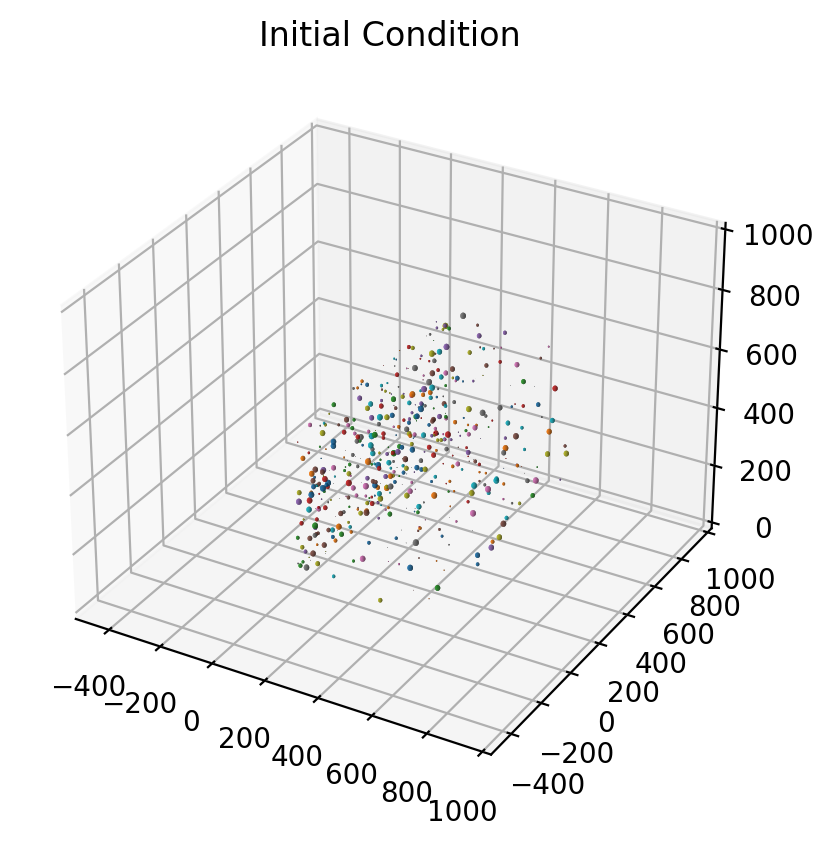

In [3]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

table = np.zeros((scale, scale))

bubbles_centers, bubbles_radii = generate_bubbles(500, table) #uses generic loaf at the moment

ax.set_title("Initial Condition")
ax.set_xlim3d(left=-500, right=1000)
ax.set_ylim3d(bottom=-500, top=1000)
ax.set_zlim3d(bottom=0, top=1000)
plt.show()

### Increase Bubbles and Make Bread Rise

Dough does not uniformly increase in size. Instead, the dough increases and then decreases at a slow rate ([Romano 2007](https://www.sciencedirect.com/science/article/pii/S0260877407001008)). I am setting each iteration to equal a minute.

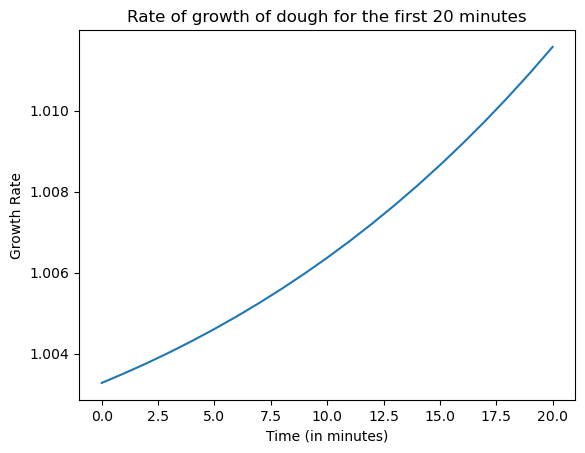

In [10]:
num = 20
x = np.linspace(0, num, num + 1)
plt.xlabel("Time (in minutes)")
plt.ylabel("Growth Rate")
plt.title("Rate of growth of dough for the first 20 minutes")
plt.plot(x, growth_function(x, .6)+1)
plt.show()

In [11]:
metadata = dict(title='Bread Bubbles', artist='Zoe Chyatte', comment='Final Project Animation')
perspective1 = FFMpegWriter(fps=15, metadata=metadata, bitrate=200000)
#perspective2 = FFMpegWriter(fps=15, metadata=metadata, bitrate=200000)
# perspective3 = FFMpegWriter(fps=15, metadata=metadata, bitrate=200000)
# perspective4 = FFMpegWriter(fps=15, metadata=metadata, bitrate=200000)

Adjusting Bubbles: 100%|██████████| 500/500 [00:11<00:00, 42.43it/s]


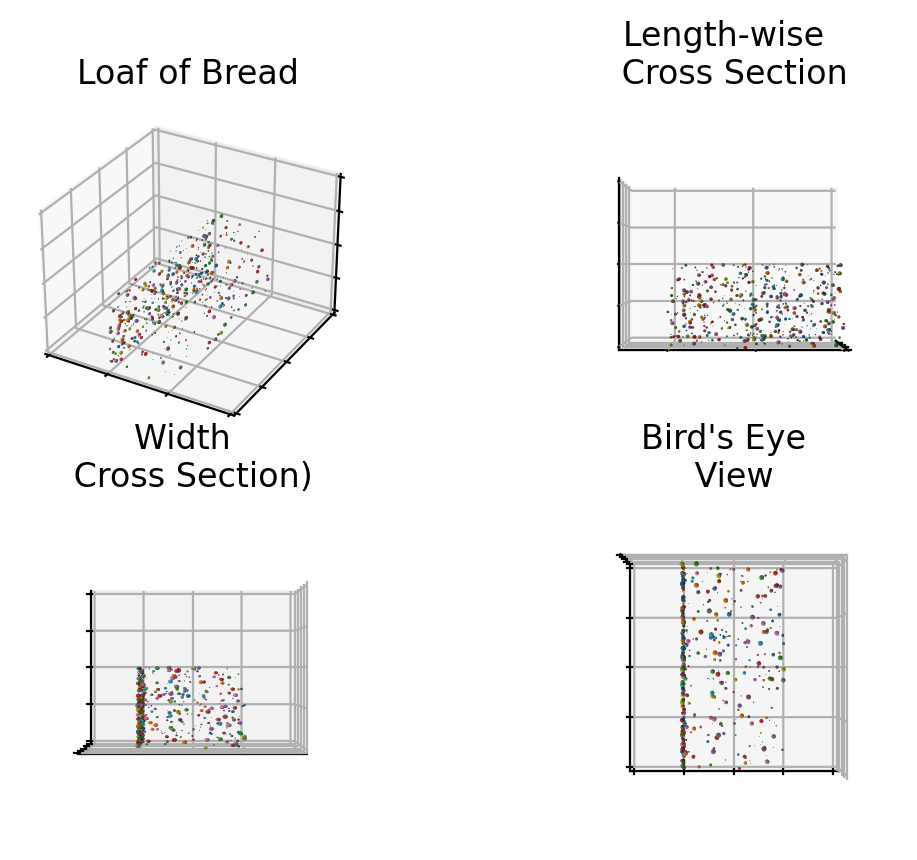

Adjusting Bubbles: 100%|██████████| 500/500 [00:07<00:00, 71.21it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:08<00:00, 59.54it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:07<00:00, 62.62it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:06<00:00, 76.92it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:12<00:00, 40.37it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:06<00:00, 78.89it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:06<00:00, 80.50it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:05<00:00, 88.60it/s] 


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:05<00:00, 87.80it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:06<00:00, 74.94it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:06<00:00, 75.04it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:05<00:00, 98.20it/s] 


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:06<00:00, 79.95it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:04<00:00, 105.03it/s][A


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:05<00:00, 92.63it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:04<00:00, 101.01it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:05<00:00, 98.11it/s] 


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:05<00:00, 94.02it/s]


<Figure size 640x480 with 0 Axes>

Adjusting Bubbles: 100%|██████████| 500/500 [00:07<00:00, 69.96it/s]


<Figure size 640x480 with 0 Axes>

Bread Rising: 100%|██████████| 20/20 [07:27<00:00, 22.38s/it]


In [12]:
%matplotlib inline
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(122, projection='3d')
# ax3 = fig.add_subplot(223, projection='3d')
# ax4 = fig.add_subplot(224, projection='3d')

bubble_centers_sorted = bubbles_centers
bubbles_radii_sorted = bubbles_radii

current_time = datetime.datetime.now()
with perspective1.saving(fig, "animation.mp4", 100):
    for iteration in tqdm(range(20), desc="Bread Rising"):
        
        fig.clear()
        
        ax1 = fig.add_subplot(221, projection='3d')
        ax2 = fig.add_subplot(222, projection='3d')
        ax3 = fig.add_subplot(223, projection='3d')
        ax4 = fig.add_subplot(224, projection='3d')
        #To Do: do I need the add_subplots here?

        #increasing size of bubbles and shifting them around

        sorted_spheres = sorted(zip(bubble_centers_sorted, bubbles_radii_sorted), key=lambda center: center[0][2]) #sorted from lowest to highest
        bubble_centers_sorted, bubbles_radii_sorted = zip(*sorted_spheres)
        
        bubble_centers_sorted = np.array(bubble_centers_sorted)
        
        growth_rate = growth_function(iteration)
        growth_scalar = 1 + growth_rate
        
        bubbles_radii_sorted = np.array(bubbles_radii_sorted) * growth_scalar
        
        #print(bubbles_radii_sorted)
        for i in tqdm(range(len(bubbles_radii)), desc="Adjusting Bubbles"):
            #bubbles_radii_sorted[i] = bubbles_radii_sorted[i] * 1.2
            
            if i > 1: #not the first sphere as nothing below
                
                #check for overlap
                x_upper_sphere = bubble_centers_sorted[i][0]
                y_upper_sphere = bubble_centers_sorted[i][1]
                z_upper_sphere = bubble_centers_sorted[i][2]
                rad_upper_sphere = int(bubbles_radii_sorted[i])

                for lower_sphere_i in range(0, i):
                    x_lower_sphere = bubble_centers_sorted[lower_sphere_i][0]
                    y_lower_sphere = bubble_centers_sorted[lower_sphere_i][1]
                    z_lower_sphere = bubble_centers_sorted[lower_sphere_i][2]
                    rad_lower_sphere = int(bubbles_radii_sorted[lower_sphere_i])
                    
                    distance_between_sphere_centers = np.sqrt((x_upper_sphere - x_lower_sphere)**2 + (y_upper_sphere - y_lower_sphere)**2 + (z_upper_sphere - z_lower_sphere)**2)
                    combined_radii = rad_upper_sphere + rad_lower_sphere
                    
                    if combined_radii > distance_between_sphere_centers:
                        increase_distance_by = combined_radii - distance_between_sphere_centers 
                        angle = np.arccos(np.dot(bubble_centers_sorted[i], bubble_centers_sorted[lower_sphere_i])/(np.linalg.norm(bubble_centers_sorted[i]) * np.linalg.norm(bubble_centers_sorted[lower_sphere_i])))
                        #print(increase_distance_by, angle)
                        bubble_centers_sorted[i][0] += increase_distance_by * np.cos(angle)
                        bubble_centers_sorted[i][1] += increase_distance_by * np.sin(angle)
                        bubble_centers_sorted[i][2] += increase_distance_by 

            x, y, z = create_sphere_x_y_z(bubble_centers_sorted[i],  bubbles_radii_sorted[i]*1.2)

            #plotting same thing, will get different views                              
            ax1.plot_surface(x, y, z)
            ax2.plot_surface(x, y, z)
            ax3.plot_surface(x, y, z)
            ax4.plot_surface(x, y, z)                              
            
        #setting up the graphing space
        #print(bubbles_radii_sorted)
        bottom_limit_val = 0
        top_limit_val = 1000

        ax1.set_title("Loaf of Bread")                             
        ax1.set_xlim3d(left=-500, right=1000)
        ax1.set_ylim3d(bottom=0, top=1000)
        ax1.set_zlim3d(bottom=0, top=1000)
             
        ax2.set_title("Length-wise \n Cross Section")                              
        ax2.set_xlim3d(left=-700, right=300)
        ax2.set_ylim3d(bottom=-250, top=1000)
        ax2.set_zlim3d(bottom=0, top=1000)
            
        ax3.set_title("Width \n Cross Section)")                               
        ax3.set_xlim3d(left=-250, right=750)
        ax3.set_ylim3d(bottom=0, top=1000)
        ax3.set_zlim3d(bottom=0, top=1000)
            
        ax4.set_title("Bird's Eye \n View")                                
        ax4.set_xlim3d(left=-250, right=750)
        ax4.set_ylim3d(bottom=0, top=1000)
        ax4.set_zlim3d(bottom=0, top=1000)

            #setting up the views
            #a1 is covered default
            #a2 is uncovered default
        ax2.view_init(0, 0) #looking at XZ
        ax3.view_init(0, -90)
        ax4.view_init(90, -90)
            #perspective3.grab_frame()
            #ax4.view_init(90, -90) #looking at XY
            #perspective4.grab_frame()  
            
        ax1.axes.xaxis.set_ticklabels([])
        ax1.axes.yaxis.set_ticklabels([])
        ax1.axes.zaxis.set_ticklabels([])
        ax2.axes.xaxis.set_ticklabels([])
        ax2.axes.yaxis.set_ticklabels([])
        ax2.axes.zaxis.set_ticklabels([])
        ax3.axes.xaxis.set_ticklabels([])
        ax3.axes.yaxis.set_ticklabels([])
        ax3.axes.zaxis.set_ticklabels([])
        ax4.axes.xaxis.set_ticklabels([])
        ax4.axes.yaxis.set_ticklabels([])
        ax4.axes.zaxis.set_ticklabels([])

            #capturing each image
        plt.draw()
        plt.pause(0.01) #Between 0.01 and 0.5

        perspective1.grab_frame()
            #perspective2.grab_frame()   
            